In [2]:
!pip install requests pandas matplotlib

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline  

In [6]:
# New York City coordinates
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # 1 week of data

# Weather data we want
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']

In [8]:
# Open-Meteo API endpoint
base_url = 'https://archive-api.open-meteo.com/v1/archive'

# Request parameters
params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

# Send the request
response = requests.get(base_url, params=params)

# Check if it worked
if response.status_code == 200:
    print('✅ Data fetched successfully!')
else:
    print(f'❌ Failed to fetch data. Status code: {response.status_code}')

✅ Data fetched successfully!


In [10]:
data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()

,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.7,99,1.0
1,2023-01-01T01:00,10.5,99,1.0
2,2023-01-01T02:00,10.4,98,0.1
3,2023-01-01T03:00,10.3,96,0.0
4,2023-01-01T04:00,9.7,95,0.0


In [12]:
df['time'] = pd.to_datetime(df['time'])

In [14]:
df.set_index('time', inplace=True)

In [16]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64


In [20]:
df.ffill(inplace=True)

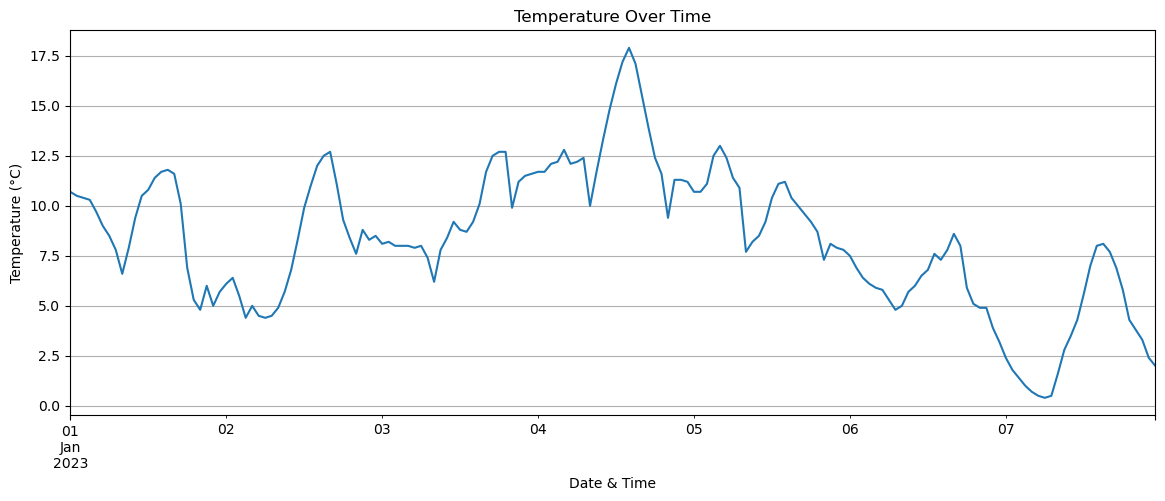

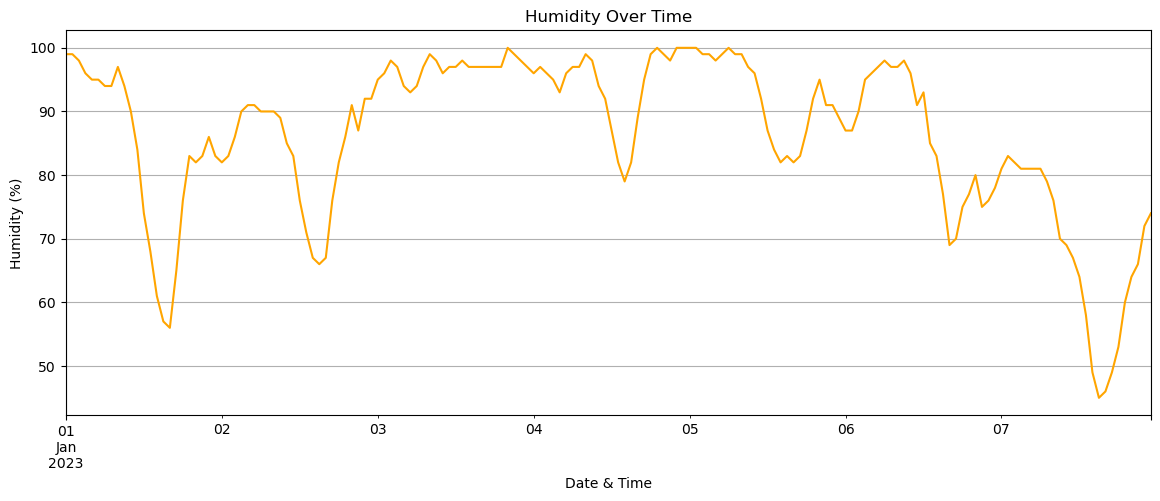

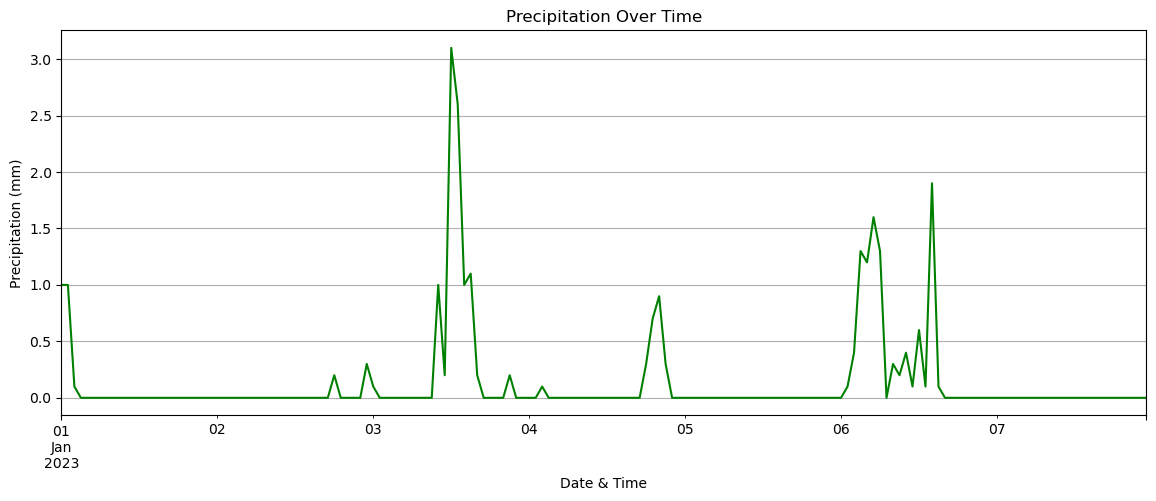

In [22]:
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(14, 5))

# Plot temperature
df['temperature_2m'].plot(title='Temperature Over Time', ylabel='Temperature (°C)', xlabel='Date & Time')
plt.grid(True)
plt.show()

# Plot humidity
plt.figure(figsize=(14, 5))
df['relativehumidity_2m'].plot(title='Humidity Over Time', ylabel='Humidity (%)', xlabel='Date & Time', color='orange')
plt.grid(True)
plt.show()

# Plot precipitation
plt.figure(figsize=(14, 5))
df['precipitation'].plot(title='Precipitation Over Time', ylabel='Precipitation (mm)', xlabel='Date & Time', color='green')
plt.grid(True)
plt.show()

In [28]:
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.24


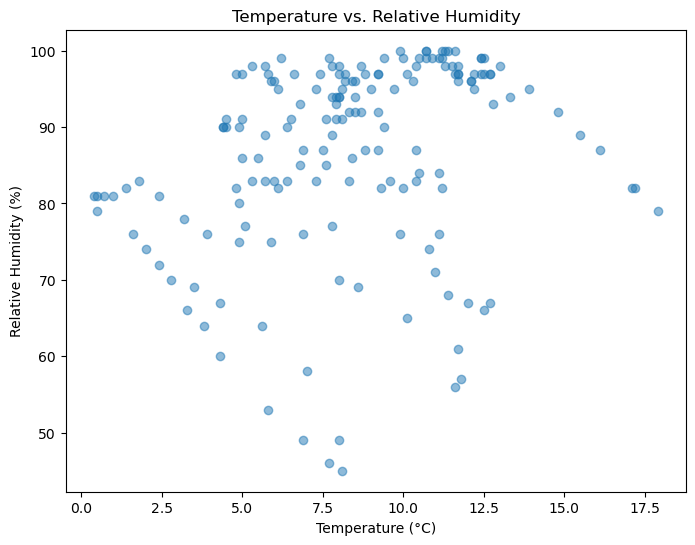

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()

In [36]:
# Resample data to daily average values
daily_avg = df.resample('D').mean()

# Show the first few rows
daily_avg.head()

,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.850000,83.708333,0.087500
2023-01-02,7.775000,83.458333,0.020833
2023-01-03,9.408333,96.875000,0.395833
2023-01-04,12.995833,94.166667,0.095833
2023-01-05,9.916667,92.666667,0.000000


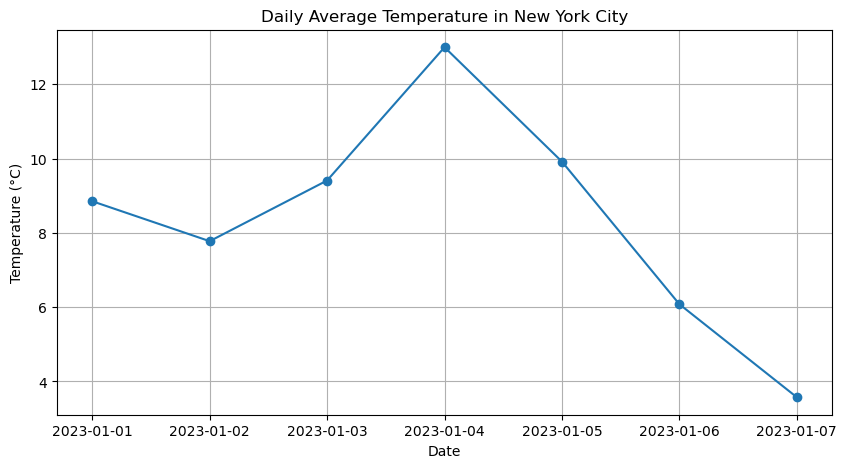

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

In [42]:
latitude_la = 34.0522
longitude_la = -118.2437

# API parameters for Los Angeles
params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

# Send request for LA weather data
response_la = requests.get(base_url, params=params_la)

# Load and clean the LA data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)
# Convert time column and set index
df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)

# Fill any missing values (use ffill instead of fillna(method='ffill'))
df_la.ffill(inplace=True)

# Resample LA data to daily averages
daily_avg_la = df_la.resample('D').mean()

In [44]:
combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})

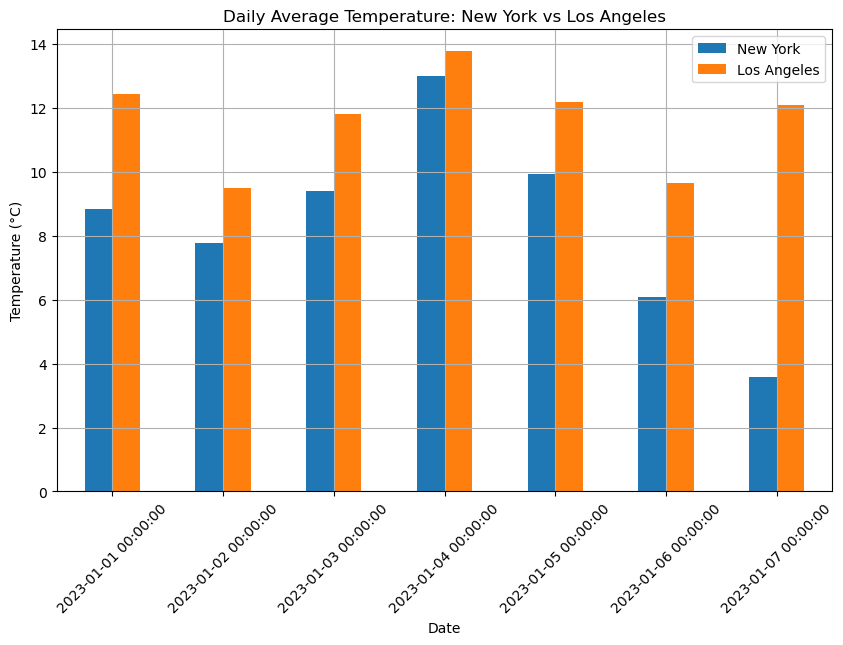

In [46]:
combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [49]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp

,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.850000,12.433333,3.583333
2023-01-02,7.775000,9.483333,1.708333
2023-01-03,9.408333,11.808333,2.400000
2023-01-04,12.995833,13.766667,0.770833
2023-01-05,9.916667,12.183333,2.266667
2023-01-06,6.079167,9.662500,3.583333
2023-01-07,3.575000,12.095833,8.520833


In [51]:
# Save cleaned New York data
df.to_csv('new_york_weather.csv')

# Save cleaned Los Angeles data
df_la.to_csv('los_angeles_weather.csv')

# Save comparison data with temperature difference
combined_temp.to_csv('ny_vs_la_comparison.csv')

print("✅ All CSV files saved successfully!")

✅ All CSV files saved successfully!
